In [ ]:
import requests

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
open_meteo_url = "https://historical-forecast-api.open-meteo.com/v1/forecast"

In [ ]:
params = {    
    "latitude": -23.5505,  # Latitude de São Paulo, por exemplo
    "longitude": -46.6333,  # Longitude de São Paulo
	"start_date": "2025-03-25",
	"end_date": "2025-03-25",
	"hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "visibility", "surface_pressure", "pressure_msl", "wind_speed_10m", "soil_temperature_0cm", "weather_code"]
    }

In [ ]:
response = requests.get(open_meteo_url, params=params)

In [ ]:
weather_data = response.json()

In [ ]:
weather_df = pd.DataFrame({key: value for key, value in weather_data["hourly"]. items()})

In [ ]:
weather_df["time"] = pd.to_datetime(weather_df["time"])

In [ ]:
print(weather_df)

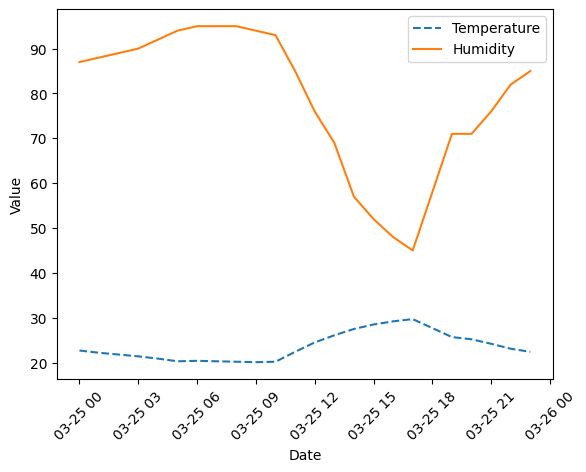

In [20]:
plt.plot(weather_df["time"], weather_df["temperature_2m"], label="Temperature", linestyle="--")	
plt.plot(weather_df["time"], weather_df["relative_humidity_2m"], label = "Humidity")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()